# SURFACE COMPLEXATION OF ZN ON FERRIHYDRITE
https://hydrochemistry.eu/exmpls/zn_sor.html

In [5]:
%pylab inline
import phreeqpython
import matplotlib.pyplot as plt
pp = phreeqpython.PhreeqPython('phreeqc.dat')

Populating the interactive namespace from numpy and matplotlib


## Phreeqc Calculation

### Percentage Sorbed Function

The following function calculates the % sorbed amount of Zn.

In [6]:
def percentageSorbed(zn, sorbed_zn):
    return (zn - sorbed_zn) / zn * 100

### Sorbtion edge of Zn Function
The following function calculates the % sorbed as function of pH

In [7]:
x_axis = [4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10.5, 11, 11.5, 12, 12.5, 13]

def calcuateSorbtionEdgeZn(zn_tot):
    sorbed_zn_list = []

    for pH in x_axis:
        solution = pp.add_solution({'pH': pH, 'Na': 150, 'N(5)': '100 charge'})
        surface = pp.add_surface({'Hfo_w': "0.2e-3, 600, 88e-3", 'Hfo_s': "0.5e-5"}, equilibrate_with=solution)
        solution.add('ZnNO3', zn_tot, 'mol')
        solution.interact(surface)

        sorbed_zn_list.append(percentageSorbed(zn_tot, solution.elements['Zn']))

    return sorbed_zn_list

### Plot the results for both 1 µM and 10 µM Zn(NO3)2

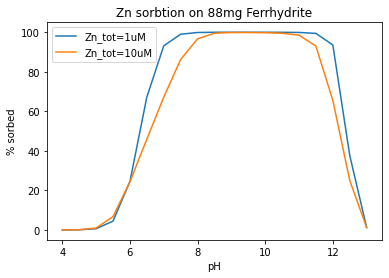

In [8]:
plt.plot(x_axis, calcuateSorbtionEdgeZn(1e-6), label="Zn_tot=1uM")
plt.plot(x_axis, calcuateSorbtionEdgeZn(10e-6), label="Zn_tot=10uM")
plt.xlabel("pH")
plt.ylabel("% sorbed")
plt.title("Zn sorbtion on 88mg Ferrhydrite")
plt.legend()
plt.show()